## Step 1: Direct Summation

The pairwise interaction in N body problems can be expressed as:

\begin{equation}
f_i = \sum_{j=1}^n{P \left(\boldsymbol{x}_i, \boldsymbol{x}_j \right)w_j} \quad \text{for} \;i=1,2,...,n
\end{equation}

where $i,j$ denotes target and source respectively. $f_i$ represents a potential (or force) at target point $i$, $w_j$ is the source weight,  $\boldsymbol{x}_i, \boldsymbol{x}_j$ are the spatial positions of the particles, and  $P \left(\boldsymbol{x}_i, \boldsymbol{x}_j \right)$ is the interaction kernel.

Without any optimization, compute the force take $\mathcal{O} (n^2)$ operations. But we are going to implement a treecode algorithm to reduce the computation cost to $\mathcal{O}( n\log n )$

We will deal with $n$ point mass particles, situated in random locations in the domain $x$, $y$, $z$ $\in$ $[0,1]$, and assuming that every particle has the same mass witha total summation of 1.

We first define our class Point which basically contains the coordinates of each particle, and a function to calculate the distance between a pair of them. 

In [1]:
import numpy
from matplotlib import pyplot, rcParams
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

# customizing plot parameters
rcParams['figure.dpi'] = 100
rcParams['font.size'] = 18
rcParams['font.family'] = 'StixGeneral'

In [2]:
class Point():
    '''
    This is the class for a point.
         
    Arguments:
    ----------
        coords: a three-elements list, containing the 3D coordinates of each point.
        domain: domain of random generated coordinates x,y,z. Default = 1.0.
             
    Attributes:
    -----------
        x, y, z: coordinates of the point. 
    '''
    
    def __init__(self, coords = [], domain=1.0):
        
        if coords:
            
            assert len(coords) == 3, "size of coords should be 3."
            
            self.x = coords[0]
            self.y = coords[1]
            self.z = coords[2]
        
        else:
            self.x = domain * numpy.random.random()
            self.y = domain * numpy.random.random()
            self.z = domain * numpy.random.random()
            
    def distance(self, other):
        
        return numpy.sqrt((self.x-other.x)**2 + (self.y-other.y)**2 +(self.z-other.z)**2)
            

In [3]:
class Particle(Point):
    '''
    The derived class for a particle, inheriting the base class "Point".
    
    Attributtes:
    ------------
        m: particle mass.
        phi: the gravitational potential of the particle.
    '''
    
    def __init__(self, coords = [], domain = 1.0, m = 1.0):
        
        Point.__init__(self, coords, domain)
        self.m = m
        self.phi = 0.
    

In [4]:
issubclass(Particle,Point)

True

Let's create our particles using our Particle class. We store them in a list. 

In [5]:
n = 50

particles = [Particle(m = 1.0/n) for i in range(n)]

We will do the direct summation, what represents what each particle "feels" the gravitational force due to the others in the system. Here, the number of interactions is $\mathcal{O} (n^2)$. The potential $\Phi_i$ at a target point $i$ can be expressed as:

\begin{equation}
    \Phi_i = \sum_{\substack{j=0\\ j \neq i}}^n{\frac{m_j}{r_{ij}}}
\end{equation}

where $m_j$ is the mass of source point $j$, and $r_{ij}$ is the distance between target point $i$ and source point $j$.

In [6]:
 def direct_sum(particles):
    '''
    Calculate the gravitational potential at each particle
    using direct summation method.

    Arguments:
    ---------- 
    particles: particles list.

    '''
    
    for i, target in enumerate(particles):
        for source in (particles[:i] + particles[i+1:]):
            
            r = target.distance(source)
            target.phi += source.m/r

In [7]:
direct_sum(particles)

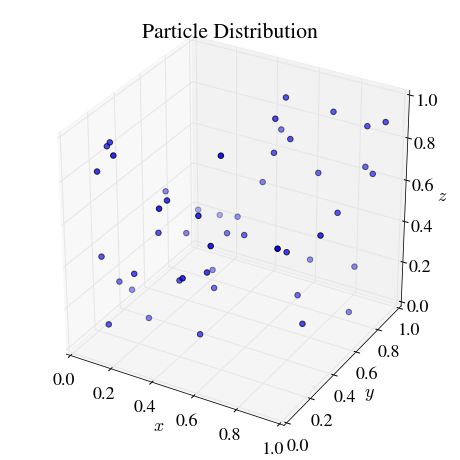

In [8]:
# plot spatial particle distribution
fig = pyplot.figure(figsize=(8,8))

ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter([particle.x for particle in particles], 
           [particle.y for particle in particles], 
           [particle.z for particle in particles], s=30, c='b')

ax.set_xlim3d(0,1)
ax.set_ylim3d(0,1)
ax.set_zlim3d(0,1)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')
ax.set_title('Particle Distribution');

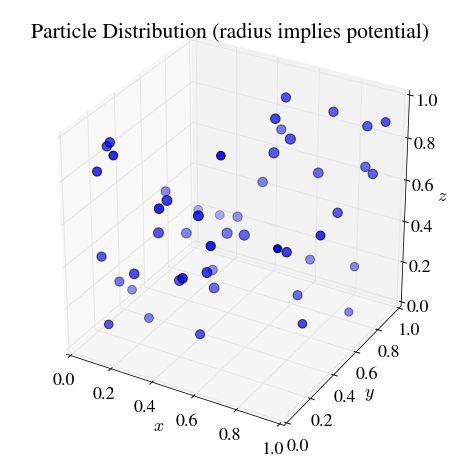

In [9]:
fig = pyplot.figure(figsize=(8,8))

ax = fig.add_subplot(1,1,1, projection='3d')
scale = 50   # scale for dot size in scatter plot
ax.scatter([particle.x for particle in particles], 
           [particle.y for particle in particles], 
           [particle.z for particle in particles],
           s=numpy.array([particle.phi for particle in particles])*scale, c='b')
ax.set_xlim3d(0,1)
ax.set_ylim3d(0,1)
ax.set_zlim3d(0,1)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')
ax.set_title('Particle Distribution (radius implies potential)');